In [1]:
import sys
sys.path.insert(0, "../src/")
from algorithms import mlsl, dual_annealing, cmaes
from framework import SaveHandler, MAX_INSTANCE_FES
from pprint import pprint

## Procedure

- 100 random algorithm instances are generated by randomly drawing from the hyper-parameter space (see Google Docs). 
- Each instance has a total number of function eval budget of 1,000,000.
- For each run the random seed and initial guess are specified for reproducibility. 
- In particular, the initial guess of the first run is very close to Ben Nevis, for simpler calculations of performance measures in hyper-parameter tuning.
- The instance with the least "Gary ERT" -- expected number of function evals to win a "Gary score" -- is selected.
- For the best instance selected, run it again with a budget of 5,000,000 function evals and output the performance measures and plots, where the first run is excluded. (I didn't run until success rate converges.)

## MLSL
### Information and performance measures for the best instance selected

In [13]:
save_handler = SaveHandler('mlsl')
algo = mlsl
algo.load_best_instance(save_handler=save_handler)
ins = algo.best_instance
ins.run(save_handler=save_handler, restart=True, max_instance_fes=MAX_INSTANCE_FES * 5)
pprint(ins.info)
pprint(ins.params)
pprint(ins.performance_measures(excluding_first=True))
pprint(len(ins.results))
pprint(sum([r.eval_num for r in ins.results]))

{'algorithm_name': 'MLSL', 'algorithm_version': 1, 'instance_index': 960}
{'population': 961}
{'avg_height': 1316.6317561195845,
 'avg_success_eval': 18587.967741935485,
 'ert': 162136.35483870967,
 'failure_rate': 0.7416666666666667,
 'gary_ert': 8294.10396039604,
 'hv': 8114.775000000001,
 'par10': 375635.225,
 'par2': 78968.55833333333,
 'sp': 71953.4235171696,
 'success_cnt': 31,
 'success_rate': 0.25833333333333336,
 'success_rate_length': 0.15491412151601924,
 'success_rate_lower': 0.1883728380805067,
 'success_rate_upper': 0.34328695959652594}
121
5027243


### Convergence plot
![convergence plot for mlsl](../img/mlsl/mlsl-convergence.png)
### Stacked graph (copying last value after termination)
![stacked graph for mlsl (copying last value after termination) ](../img/mlsl/mlsl-stacked.png)
### Stacked graph (white after termination)
![stacked graph for mlsl (white after termination)](../img/mlsl/mlsl-stacked-3.png)

## Dual Annealing
### Information and performance measures for the best instance selected

In [15]:
save_handler = SaveHandler('dual-annealing-2')
algo = dual_annealing
algo.load_best_instance(save_handler=save_handler)
ins = algo.best_instance
ins.run(save_handler=save_handler, restart=True, max_instance_fes=MAX_INSTANCE_FES * 5)
pprint(ins.info)
pprint(ins.params)
pprint(ins.performance_measures(excluding_first=True))
pprint(len(ins.results))
pprint(sum([r.eval_num for r in ins.results]))

{'algorithm_name': 'Dual Annealing',
 'algorithm_version': 3,
 'instance_index': 225189433}
{'accept': -3.33337,
 'initial_temp': 79.77754246615842,
 'restart_temp_ratio': 0.0033935664873233104,
 'visit': 2.8292929292929294}
{'avg_height': 1312.102352338263,
 'avg_success_eval': 24189.08,
 'ert': 200189.07999999996,
 'failure_rate': 0.7787610619469026,
 'gary_ert': 10213.728571428572,
 'hv': 5710.380530973452,
 'par10': 394732.09734513273,
 'par2': 83227.67256637168,
 'sp': 109334.6416,
 'success_cnt': 25,
 'success_rate': 0.22123893805309736,
 'success_rate_length': 0.15164100696078606,
 'success_rate_lower': 0.1545837361055079,
 'success_rate_upper': 0.30622474306629394}
114
5004766


### Convergence plot
![convergence plot for da](../img/da/dual-annealing-convergence.png)
### Stacked graph (copying last value after termination)
![stacked graph for da (copying last value after termination) ](../img/da/dual-annealing-stacked.png)
### Stacked graph (white after termination)
![stacked graph for da (white after termination)](../img/da/dual-annealing-stacked-3.png)

## CMAES
### Information and performance measures for the best instance selected

In [17]:
save_handler = SaveHandler('cmaes-1')
algo = cmaes
algo.load_best_instance(save_handler=save_handler)
ins = algo.best_instance
ins.run(save_handler=save_handler, restart=True, max_instance_fes=MAX_INSTANCE_FES * 5)
pprint(ins.info)
pprint(ins.params)
pprint(ins.performance_measures(excluding_first=True))
pprint(len(ins.results))
pprint(sum([r.eval_num for r in ins.results]))

{'algorithm_name': 'CMAES', 'algorithm_version': 1, 'instance_index': 64}
{'population_size': 7, 'sigma0_n': 9}
{'avg_height': 889.2217245601929,
 'avg_success_eval': 428.6666666666667,
 'ert': 1666498.666666667,
 'failure_rate': 0.9993772057297073,
 'gary_ert': 2984.7737313432835,
 'hv': 30.87274237077019,
 'par10': 499688.8698359975,
 'par2': 99937.9875441146,
 'sp': 688295.7777777778,
 'success_cnt': 3,
 'success_rate': 0.0006227942702927133,
 'success_rate_length': 0.0016178202387263228,
 'success_rate_lower': 0.00021182451751020114,
 'success_rate_upper': 0.001829644756236524}
4818
5000301


### Convergence plot
![convergence plot for cmaes](../img/cmaes/CMAES-convergence.png)
### Stacked graph (copying last value after termination)
![stacked graph for cmaes (copying last value after termination) ](../img/cmaes/CMAES-stacked.png)
### Stacked graph (white after termination)
![stacked graph for cmaes (white after termination)](../img/cmaes/CMAES-stacked-3.png)

## Notes

In [4]:
r = [{
    'name': 'MLSL',
    '# of runs': 121,
    'avg_height': 1316.6317561195845,
    # 'avg_success_eval': 18587.967741935485,
    'ert': 162136.35483870967,
    # 'failure_rate': 0.7416666666666667,
    'gary_ert': 8294.10396039604,
    'hv': 8114.775000000001,
    'par10': 375635.225,
    'par2': 78968.55833333333,
    # 'sp': 71953.4235171696,
    # 'success_cnt': 31,
    'success_rate': 0.25833333333333336,
    # 'success_rate_length': 0.15491412151601924,
    # 'success_rate_lower': 0.1883728380805067,
    # 'success_rate_upper': 0.34328695959652594
 }, {
    'name': 'Dual Annealing',
    '# of runs': 114,
    'avg_height': 1312.102352338263,
    # 'avg_success_eval': 24189.08,
    'ert': 200189.07999999996,
    # 'failure_rate': 0.7787610619469026,
    'gary_ert': 10213.728571428572,
    'hv': 5710.380530973452,
    'par10': 394732.09734513273,
    'par2': 83227.67256637168,
    # 'sp': 109334.6416,
    # 'success_cnt': 25,
    'success_rate': 0.22123893805309736,
    # 'success_rate_length': 0.15164100696078606,
    # 'success_rate_lower': 0.1545837361055079,
    # 'success_rate_upper': 0.30622474306629394
 }, {
    'name': 'CMAES',
    '# of runs': 4818,
    'avg_height': 889.2217245601929,
    # 'avg_success_eval': 428.6666666666667,
    'ert': 1666498.666666667,
    # 'failure_rate': 0.9993772057297073,
    'gary_ert': 2984.7737313432835,
    'hv': 30.87274237077019,
    'par10': 499688.8698359975,
    'par2': 99937.9875441146,
    # 'sp': 688295.7777777778,
    # 'success_cnt': 3,
    'success_rate': 0.0006227942702927133,
    # 'success_rate_length': 0.0016178202387263228,
    # 'success_rate_lower': 0.00021182451751020114,
    # 'success_rate_upper': 0.001829644756236524
}]
import pandas as pd
df = pd.DataFrame(r)
df

,name,# of runs,avg_height,ert,gary_ert,hv,par10,par2,success_rate
0,MLSL,121,1316.631756,1.621364e+05,8294.103960,8114.775000,375635.225000,78968.558333,0.258333
1,Dual Annealing,114,1312.102352,2.001891e+05,10213.728571,5710.380531,394732.097345,83227.672566,0.221239
2,CMAES,4818,889.221725,1.666499e+06,2984.773731,30.872742,499688.869836,99937.987544,0.000623


(Larger HV and smaller ERT, Gary ERT, PAR10, and PAR2 indicate better performance.)

Some observations:
- The performance measures of MLSL and Dual Annealing are similar, with MLSL doing slightly better in terms of all measures above;
- The instance selected for CMEAS is more of a "local optimiser" (population size = 7). The success rate is notably low (as expected) and consequently does not do well in all measures except Gary ERT, which it however has the lowest among all three optimisers;
- The hyper-parameters selected for Dual Annealing have accept = -3.33 and visit = 2.83, which are not too far from the default values (accept = -5 and visit = 2.62);
- The population size selected for MLSL is 961 while I set the trial space to be [1..1000]. It is close to the end point 1,000, but larger population sizes (967, 977, and 994) have been tried in the hyper-parameter tuning process. It thus might not be a problem, but we might still want the end point to be larger?


In [2]:
save_handler = SaveHandler('mlsl')
algo = mlsl
algo.load_instance_indices(save_handler)
sorted(list(algo.instance_indices))[-5:]

[945, 960, 966, 976, 993]

### Plots showing the correlation between population size and Gary ERT for MLSL and CMAES

NB: the following plots are based on 1M function evals for an instance while the table above is based on 5M.

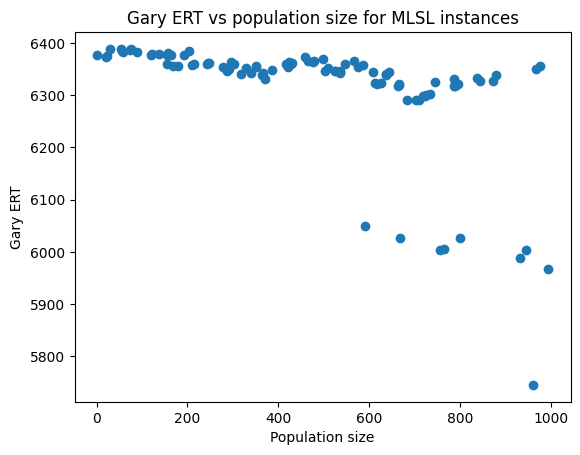

In [3]:
xs = []
ys = []
for i in algo.instance_indices:
    ins = algo.generate_instance(i)
    ins.load_partial_results(save_handler)
    xs.append(ins.params['population'])
    ys.append(ins.performance_measures(max_instance_fes=1_000_000)['gary_ert'])

import matplotlib.pyplot as plt

plt.scatter(xs, ys)
plt.xlabel('Population size')
plt.ylabel('Gary ERT')
plt.title('Gary ERT vs population size for MLSL instances')

plt.show()

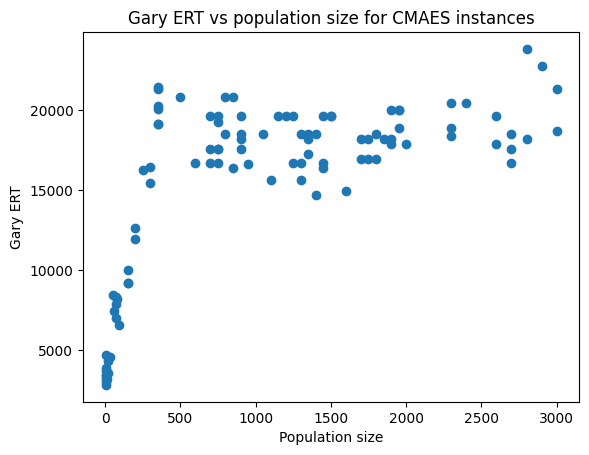

In [4]:
save_handler = SaveHandler('cmaes-1')
algo = cmaes
algo.load_instance_indices(save_handler)

xs = []
ys = []
for i in algo.instance_indices:
    ins = algo.generate_instance(i)
    ins.load_partial_results(save_handler)
    xs.append(ins.params['population_size'])
    ys.append(ins.performance_measures(max_instance_fes=1_000_000)['gary_ert'])

import matplotlib.pyplot as plt

plt.scatter(xs, ys)
plt.xlabel('Population size')
plt.ylabel('Gary ERT')
plt.title('Gary ERT vs population size for CMAES instances')
plt.show()